# Classification of breast cancer data  [35 points]

You will implement a Support Vector Machine (SVM) model for the classification of breast cancer data and compare its performance with K-nearest Neighbors.

#### Loading the data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# added for final run of notebook to suppress deprecation warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## loading the raw data using pandas
bc = pd.read_csv('data.csv')
bc = bc.drop(bc.columns[-1],axis=1)
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Pre-process and understand data (5 pts)

The data label is the diagnosis (M = malignant, B = benign).

**Question (2pts):** Convert diagnosis column to binary 0-1 label where 1 incidates malignancy.

In [3]:
# convert diagnosis to numerical label (M = malignant, B = benign)
y = pd.DataFrame(np.where(bc['diagnosis'].str.contains('M'), 1, 0))
y = y[0].tolist()
bc['diagnosis'] = y
y[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

**Question (3pts):** Plot the first 2 features against diagnosis. Is the data linearly separable and what happens if we fit a hard-margin SVM to the data?

**Answer:** No, the data is not perfectly linearly separable, so if we attempt to fit a hard-margin SVM to the data, the SVM will quit and no solution will be found.

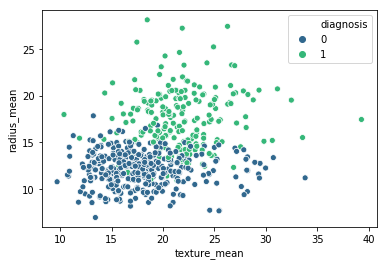

In [4]:
# plotting the the first 2 features against diagnosis
sns.scatterplot(x='texture_mean', y='radius_mean', data=bc, hue='diagnosis', palette='viridis');

#### Splitting the data: training and test 

In [5]:
from sklearn.model_selection import train_test_split

X = bc.drop(["id", "diagnosis"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 1. Support Vector Machine (SVM) (20 pts)

**Question (15pts):** Train and test a SVM model with the following requirements:
- Use GridSearchCV to find the best combination of model hyper-parameters: kernel: {linear, rbf}; for both kernel, C:{1, 10, 100, 1000}; for rbf kernel 'gamma' = {1e-3, 1e-4, 1e-5}.
- Try both accuracy and recall metric as scoring function in GridSearchCV
- Report the best hyper-parameter setting for each metric
- Report and plot the confusion matrix of the best estimator for each metric

# Tuning hyper-parameters for accuracy

Best parameters for accuracy:
{'C': 1, 'kernel': 'linear'}



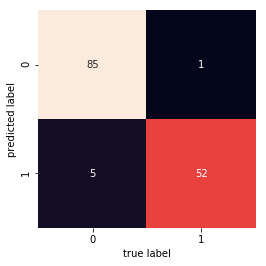

# Tuning hyper-parameters for recall


C:\Users\amand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Best parameters for recall:
{'C': 10, 'kernel': 'linear'}



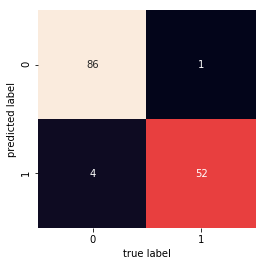

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

svc = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy', 'recall']

for sc in scores:
    print("# Tuning hyper-parameters for %s" % sc)
    svc = GridSearchCV(SVC(), param_grid, cv=5, scoring=sc)
    svc.fit(X_train, y_train)
    print()

    print('Best parameters for %s:' %sc)
    print(svc.best_params_)
    print()
    y_pred_svc = svc.predict(X_test)
    
    # computing and plotting confusion matrix  
    mat = confusion_matrix(y_test, y_pred_svc)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

**Question (5pts):** Fit an SVM model to a slice of data that contains only the first 2 features and visualize decision boudary based on these two features.

In [7]:
# code credited to Recitation_9 notes
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=3, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

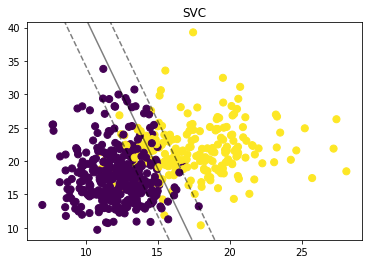

In [8]:
from sklearn import metrics

# for display purposes, we fit the model on the first two features
svc_best = SVC(kernel='linear', C=1)
svc_best.fit(X_train.loc[:,'radius_mean':'texture_mean'], y_train)

# Plotting the decision boundary for all data (both train and test)
plt.scatter(x='radius_mean', y='texture_mean', data=X, c=y, s=50, cmap='viridis')
plot_svc_decision_function(svc_best);
plt.title('SVC')
plt.show()

### 2. K-nearest Neighbors classifier (10pts)

**Question:** Repeat all the tasks for SVM to train a kNN classifier where the hyper-parameter is only k (number of neighbors) ranging from 1 to 50 in kNN. Compare the results with those of SVM, which classifier gives better results?

**Answer:** Of the classifiers trained, the linear-kernel SVM with C=10 did the best. Both the SVM and KNN models misclassified approximately the same total number of observations (5 for SVM and 6 for KNN), however the SVM model only had one false negative, whereas the KNN model had 4. In the case of breast cancer prediction, the false negative is the more potentially harmful case, so we would want to choose the model that minimizes false negatives over false positives.

# Tuning hyper-parameters for accuracy
Best parameters for accuracy:
{'n_neighbors': 9}



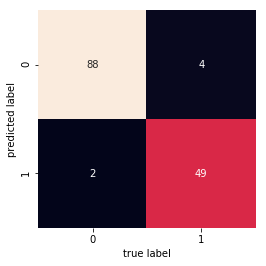

# Tuning hyper-parameters for recall


C:\Users\amand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters for recall:
{'n_neighbors': 9}



C:\Users\amand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


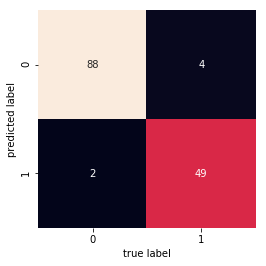

In [13]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() 
k_range = list(np.arange(1,51))
param_grid = dict(n_neighbors=k_range)
scores = ['accuracy', 'recall']

for sc in scores:
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring=sc)
    grid_knn.fit(X_train,y_train)
    knn = grid_knn
    y_pred_knn = knn.fit(X_train, y_train)
    
    print('Best parameters for %s:' %sc)
    print(grid_knn.best_params_)
    print()
    y_pred_knn = knn.predict(X_test)
    
    mat = confusion_matrix(y_test, y_pred_knn)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()


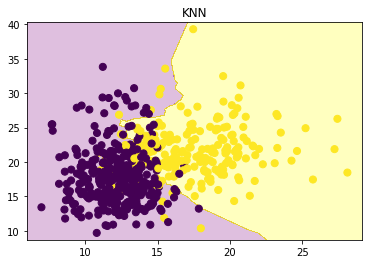

In [14]:
# Plotting the decision boundary for all data (both train and test)
from matplotlib.colors import ListedColormap

# for display purposes, we fit the model on the first two features
knn_best = KNeighborsClassifier(n_neighbors=9)
knn_best.fit(X_train.loc[:,'radius_mean':'texture_mean'], y_train)

# copying X_test, y_test to X_set and y_set. Remeber X has two columns
X_set, y_set = X.loc[:,'radius_mean':'texture_mean'], np.array(y)

# creating a meshgrid where each point is classifed using learned kNN
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn_best.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('purple', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(x='radius_mean', y='texture_mean', data=X, c=y, s=50, cmap='viridis')

plt.title('KNN')
plt.show()